In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%time from data import *

CPU times: user 43.1 s, sys: 7.3 s, total: 50.4 s
Wall time: 50.5 s


In [4]:
import pandas as pd
import numpy as np


from bokeh.io import output_notebook, show
output_notebook()
from bokeh.charts import Bar


%matplotlib inline
import seaborn
seaborn.set()

Loading BokehJS ...

# item info display

In [126]:
from feature import *

[autoreload of feature failed: Traceback (most recent call last):
  File "/home/idm/.local/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'word_ngrams'
]
[autoreload of dateutil.rrule failed: Traceback (most recent call last):
  File "/home/idm/.local/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: inner_func() requires a code object with 1 free vars, not 0
]
[autoreload of data.pair_feature failed: Traceback (most recent call last):
  File "/home/idm/.local/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
NameError: name 'gen_description_feature' is not defined
]


In [7]:
item_pairs_train.head(5)

,itemID_1,itemID_2,isDuplicate,generationMethod
0,1,4112648,1,1
1,3,1991275,1,1
2,4,1223296,0,1
3,7,1058851,1,1
4,8,2161930,1,1


In [8]:
show_item_pair(4, 1223296)

# pair feature

In [9]:
from data.pair_feature import *

In [12]:
simple_features_train.mean()

attrsJSON_item_jaccard    0.772156
attrsJSON_key_jaccard     0.937737
price_diff_ratio          0.153077
same_categoryID           1.000000
same_description          0.062473
same_lat_lon              0.818989
same_locationID           0.928745
same_metroID              0.303359
same_title                0.230323
dtype: float64

In [11]:
simple_features_test.mean()

attrsJSON_item_jaccard    0.790670
attrsJSON_key_jaccard     0.938827
price_diff_ratio          0.137276
same_categoryID           1.000000
same_description          0.072985
same_lat_lon              0.831548
same_locationID           0.897387
same_metroID              0.246187
same_title                0.250316
dtype: float64

# pair exploration

In [13]:
item_pairs_train.isDuplicate.value_counts(normalize=True)

0    0.577362
1    0.422638
Name: isDuplicate, dtype: float64

In [14]:
item_pairs_train.generationMethod.value_counts(normalize=True)

1    0.682492
3    0.270067
2    0.047441
Name: generationMethod, dtype: float64

In [15]:
item_pairs_train.groupby('generationMethod')['isDuplicate'].mean()

generationMethod
1    0.508611
2    1.000000
3    0.103955
Name: isDuplicate, dtype: float64

duplication ratio is quite diffent acrosss generationMethod

In [16]:
(item_pairs_train.itemID_1 < item_pairs_train.itemID_2).all()

True

In [18]:
(item_pairs_test.itemID_1 < item_pairs_test.itemID_2).all()

True

itemID_1 < itemID_2

In [19]:
item_pairs_train.head()

,itemID_1,itemID_2,isDuplicate,generationMethod
0,1,4112648,1,1
1,3,1991275,1,1
2,4,1223296,0,1
3,7,1058851,1,1
4,8,2161930,1,1


In [20]:
item_pairs_train.groupby(['itemID_1', 'itemID_2'])['isDuplicate'].count().max()

1

In [21]:
item_pairs_test.groupby(['itemID_1', 'itemID_2'])['itemID_1'].count().max()

1

item pair is unique

In [22]:
ids_train = set(item_pairs_train.itemID_1.tolist() + item_pairs_train.itemID_2.tolist())
n_ids_train = len(ids_train)
print(n_ids_train)

3344613


In [23]:
print(item_pairs_train.shape[0])
item_pairs_train.shape[0] / ((n_ids_train**2 -n_ids_train)/2)

2991396


5.348257232893055e-07

In [24]:
ids_test = set(item_pairs_test.itemID_1.tolist() + item_pairs_test.itemID_2.tolist())
n_ids_test = len(ids_test)
print(n_ids_test)

1315205


In [25]:
print(item_pairs_test.shape[0])
item_pairs_test.shape[0] / ((n_ids_test**2 -n_ids_test)/2)

1044196


1.2073284887691106e-06

* only tiny fraction is labelled
* test pair is more than train

In [26]:
ids_train.intersection(ids_test)

set()

In [27]:
sorted(ids_train)[:20]

[1, 3, 4, 7, 8, 9, 12, 15, 16, 19, 20, 21, 22, 26, 28, 29, 32, 33, 35, 39]

In [28]:
sorted(ids_test)[:10]

[5, 6, 11, 23, 30, 31, 36, 47, 48, 52]

In [29]:
len(ids_train) + len(ids_test) - max(max(ids_train), max(ids_test))

-1452185

* train, test id has no intersection
* it's not complete as id

# category

In [30]:
category_parent.parentCategoryID.value_counts()

6      9
7      7
4      7
35     6
2      6
5      5
1      5
113    2
110    2
8      2
Name: parentCategoryID, dtype: int64

In [ ]:
import networkx as nx
category_tree = nx.DiGraph()
category_tree.add_edges_from(category_parent.to_records(index=False))
from networkx.drawing.nx_agraph import graphviz_layout
nx.draw(category_tree, graphviz_layout(category_tree),
        node_size=400,
        with_labels=True, arrows=True)

# info

In [34]:
set(item_info_train.index) == ids_train

True

In [35]:
set(item_info_test.index) == ids_test

True

data is consistent

In [36]:
item_info_train.head()

,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
itemID,,,,,,,,,,
1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"[1064094, 5252822, 6645873, 6960145, 9230265]",{'Вид техники': 'Грузовики'},300000.0,648140,NaN,64.686946,30.815924
3,14,Yamaha r6,Весь в тюнинге.,"[11919573, 14412228, 3204180, 6646877]","{'Вид техники': 'Мотоциклы', 'Вид мотоцикла': ...",300000.0,639040,NaN,55.678037,37.256548
4,84,iPhone 3gs 8gb,"Телефон в хорошем состоянии, трещин и сколов н...","[14384831, 6102021]",{'Вид телефона': 'iPhone'},3500.0,640650,NaN,56.239398,43.460458
7,84,Xiaomi Mi4 3гб RAM + 16гб ROM белый,"Отличный подарок на новый год от ""китайской ap...",[],{'Вид телефона': 'Другие марки'},13500.0,662210,NaN,55.777170,37.586194
8,39,Лыжные ботинки,"Лыжные ботинки в хорошем состоянии, 34 размер","[13718854, 4787310]",{'Вид товара': 'Зимние виды спорта'},500.0,624360,NaN,55.777170,37.586194


In [37]:
item_info_train.shape[0]

3344613

## missing value

In [38]:
item_info_train.isnull().mean()

categoryID      0.000000e+00
title           2.989883e-07
description     3.139377e-05
images_array    0.000000e+00
attrsJSON       0.000000e+00
price           9.631189e-02
locationID      0.000000e+00
metroID         6.708752e-01
lat             0.000000e+00
lon             0.000000e+00
dtype: float64

* categoryID, price, locationID, lat, lon is never missing
* one title is missing
* description has a tiny fraction missing
* price, metroID has fair missing

In [39]:
item_info_train[item_info_train.title.isnull()]

,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
itemID,,,,,,,,,,
3504881,90,NaN,NaN,[],{'Порода': 'Шотландская'},NaN,635320,NaN,56.008691,92.870529


item with null title

In [40]:
item_info_train[item_info_train.description.isnull()].head()

,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
itemID,,,,,,,,,,
553,29,Джинсовая курточка 98р,NaN,[12702386],"{'Предмет одежды': 'Другое', 'Вид одежды': 'Дл...",300.0,653240,437.0,59.829328,30.375588
9638,19,Котёл на отработанном масле,NaN,"[11183239, 254576, 4062573]",{'Вид товара': 'Камины и обогреватели'},7000.0,640860,149.0,56.241596,43.860172
24724,27,DG,NaN,[8260717],"{'Предмет одежды': 'Обувь', 'Размер': '38', 'В...",NaN,630090,NaN,54.710303,20.510784
57639,97,USB Hard-Drive Transfer Kit Xbox 360,NaN,[6078535],{'Вид товара': 'Игровые приставки'},400.0,632490,NaN,57.767256,40.926984
240714,29,Брючки next 4-5л. 110см,NaN,"[12532849, 4075481, 5460728]","{'Предмет одежды': 'Брюки', 'Размер': 'Без раз...",650.0,653240,437.0,59.829328,30.375588


## frequent title

In [41]:
title_freq = item_info_train.title.value_counts(normalize=True)

In [42]:
title_freq.head()

Ищу работу       0.005867
Платье           0.003731
Сниму комнату    0.001410
Куртка           0.001141
Водитель         0.001029
Name: title, dtype: float64

* Ищу работу: Looking for work
* Платье: Dress
* Сниму комнату: Renting a Room
* Куртка: Jacket
* Водитель: Driver

In [43]:
title_freq_high = title_freq[title_freq > 5e-4]

In [44]:
p = Bar(title_freq_high, plot_width=1000)
show(p)

In [46]:
title_freq_freq = item_info_train.title.value_counts().value_counts()

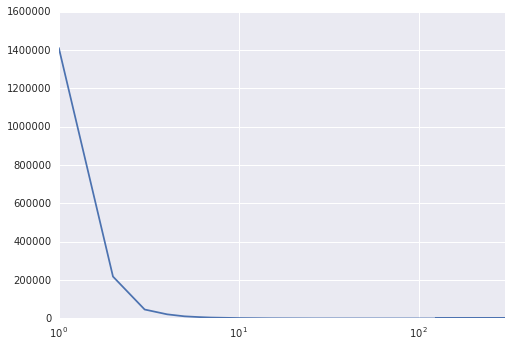

In [47]:
title_freq_freq.plot(logx=True)

In [48]:
from util import df_sample_n

In [49]:
df_sample_n(item_pairs_train, 5, 12)

,itemID_1,itemID_2,isDuplicate,generationMethod
1461501,1726575,4369469,0,1
2661617,4069878,5216887,0,3
2133634,2822325,5102216,1,1
2303235,3165159,3985421,1,1
1392564,1629096,4602213,0,3


In [50]:
show_item_pair(2822325, 5102216)

In [51]:
df_sample_n(item_pairs_train[(item_pairs_train.generationMethod==3) & (item_pairs_train.isDuplicate==1)] , 5, 12)

,itemID_1,itemID_2,isDuplicate,generationMethod
2831307,4691336,4857731,1,3
722032,781106,2134253,1,3
1435319,1688845,6002197,1,3
1299278,1502002,5856886,1,3
2667967,4089079,4484153,1,3


In [52]:
show_item_pair(4691336, 4857731)

# geo location

In [53]:
lat_lon_freq = item_info_train.groupby(['lat', 'lon'])['title'].count().order(ascending=False).reset_index().rename(columns={'title': 'count'})

/home/idm/.local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [54]:
lat_lon_freq['ratio'] = lat_lon_freq['count']/item_info_train.shape[0]
lat_lon_freq['size'] = 50*lat_lon_freq['ratio']**(1/3)

In [55]:
lat_lon_freq.head(20)

,lat,lon,count,ratio,size
0,55.777170,37.586194,480356,0.143621,26.184390
1,55.753653,37.619800,127167,0.038021,16.813038
2,45.034942,38.976032,65366,0.019544,13.468070
3,47.227151,39.744972,51283,0.015333,12.421647
4,54.738437,55.983161,42980,0.012851,11.711437
5,55.152161,61.387103,39926,0.011937,11.427204
6,59.938806,30.314278,36090,0.010790,11.048848
7,58.004785,56.237654,30679,0.009173,10.466507
8,42.983106,47.504978,30347,0.009073,10.428615
9,48.707793,44.515942,28661,0.008569,10.231795


In [56]:
from bokeh.models import GMapPlot, GMapOptions, Circle, ColumnDataSource, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool

map_options = GMapOptions(lat=55.777170, lng=37.586194, zoom=4)

plot = GMapPlot(
     x_range=DataRange1d(), y_range=DataRange1d(),
    map_options=map_options, title="location"
)
circles = Circle(x='lon', y='lat', size='size', fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(ColumnDataSource(lat_lon_freq.head(1000)), circles)
plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
plot.plot_width = 1000
show(plot)

# attrJson

In [57]:
tmp = pd.DataFrame(item_info_train.attrsJSON.head(1000).tolist())

In [58]:
item_info_train.attrsJSON.iloc[3]

{'Вид телефона': 'Другие марки'}

# similarity